## Feature importance quantifies the contribution of each input variable to the predictive performance of a machine learning model. It aids in identifying key factors influencing model outcomes and supports effective feature selection for improved accuracy and interpretability.

Techniques for Feature Importance:

Random Forest Importanx.
Decision Tree Importa
y.
Coefficients in Linear Moels:

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


data=pd.read_csv('prep.csv')
data=pd.get_dummies(data,drop_first=True)
data

indep=data.drop('classification_yes',axis=1)
dep=data['classification_yes']


def split_scaler(indep,dep):
    x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.25,random_state=0)
    sc=StandardScaler()
    x_train=sc.fit_transform(x_train)
    x_test=sc.transform(x_test)
    return x_train,x_test,y_train,y_test

def cm_prediction(classifier,x_test):
    y_pred=classifier.predict(x_test)

    
    cm=confusion_matrix(y_test,y_pred)
    
    accuracy=accuracy_score(y_test,y_pred)
    report= classification_report(y_test,y_pred)
    return cm,accuracy,report,x_test,y_test,classifier

In [15]:
#finding feature selection for Random Forest
x_train,x_test,y_train,y_test=train_test_split(indep,dep,test_size=0.25,random_state=0)  

# Fit a Linear Regression model

In [41]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

# Extract and print coefficients
importances_linear = linear_reg.coef_
for feature, importance in zip(indep, importances_linear):
    print(feature, importance)

age 0.0002799386733257197
bp 0.0018630177651410276
al -0.003166065201906106
su -0.016462048230744368
bgr 0.0004057272334814323
bu -0.0008061214513297202
sc -0.005251712833413079
sod -0.006465147344578442
pot 0.024535655789472064
hrmo -0.06016766135537924
pcv -0.0020961662419321098
wc 1.3091108679370982e-05
rc -0.031007183725864716
sg_b -0.17383599899573482
sg_c 0.2902390253733925
sg_d 0.3260560975358439
sg_e 0.2520000445157397
rbc_normal -0.0907706787234409
pc_normal 0.01052613806816397
pcc_present 0.004188369634938523
ba_present -0.06592747961836588
htn_yes 0.11704436970542245
dm_yes 0.12579457619850767
cad_yes -0.02155824003613012
appet_yes -0.022858201301170313
pe_yes 0.02803882230463263
ane_yes -0.03971292617054195


In [42]:
# Create a DataFrame and plot the coefficients
df_linear_sorted = df_linear.sort_values(by='Importances',  ascending=False)


In [43]:
df_linear_sorted.head(10)

,Feature_Names,Importances
15,sg_d,0.326056
14,sg_c,0.290239
16,sg_e,0.252000
22,dm_yes,0.125795
21,htn_yes,0.117044
25,pe_yes,0.028039
8,pot,0.024536
18,pc_normal,0.010526
19,pcc_present,0.004188
1,bp,0.001863


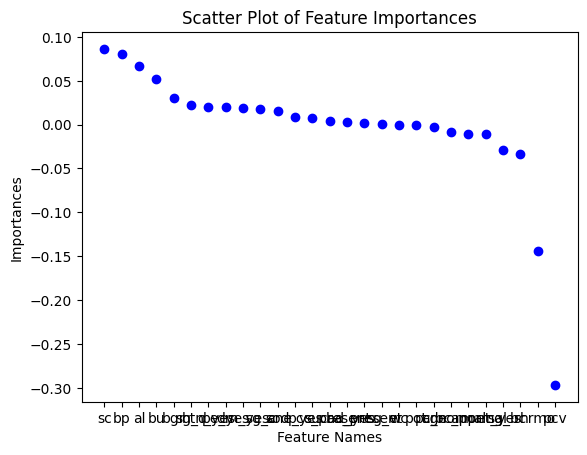

In [54]:
plt.scatter(dflog1['Feature_Names'], dflog1['Importances'], color='blue')

# Add title and labels
plt.title('Scatter Plot of Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Importances')

# Show the plot
plt.show()

# with LogisticRegression

In [45]:
logistic =LogisticRegression()
logistic.fit(x_train,y_train)
importances=logistic.coef_[0]

for coef, importance in zip(indep, importances):
    print(coef, importance)



age -0.002445914808955699
bp 0.08085345001743907
al 0.0673595855075623
su 0.007274155392109882
bgr 0.03030965748264424
bu 0.052476526717447985
sc 0.0864600828155931
sod 0.015599172618625626
pot -0.0003362045184976936
hrmo -0.143926685902629
pcv -0.29654055157894504
wc 8.51351493190459e-05
rc -0.0329607175818889
sg_b -0.028368841215126398
sg_c 0.01823692365637305
sg_d 0.021994317147965094
sg_e 0.0008500519879219573
rbc_normal -0.010965614049332639
pc_normal -0.008476482209069939
pcc_present 0.004594718396901933
ba_present 0.002099028482040511
htn_yes 0.020512426351591576
dm_yes 0.018743716279150852
cad_yes 0.0030664615762715196
appet_yes -0.011004618270554723
pe_yes 0.020176526037665864
ane_yes 0.008146400324881127


C:\Users\poorn\Anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
dflog=pd.DataFrame({'Feature_Names':indep.columns,'Importances':logistic.coef_[0]})
dflog1=dflog.sort_values(by='Importances',ascending=0)
dflog1

,Feature_Names,Importances
6,sc,0.086460
1,bp,0.080853
2,al,0.067360
5,bu,0.052477
4,bgr,0.030310
15,sg_d,0.021994
21,htn_yes,0.020512
25,pe_yes,0.020177
22,dm_yes,0.018744
14,sg_c,0.018237


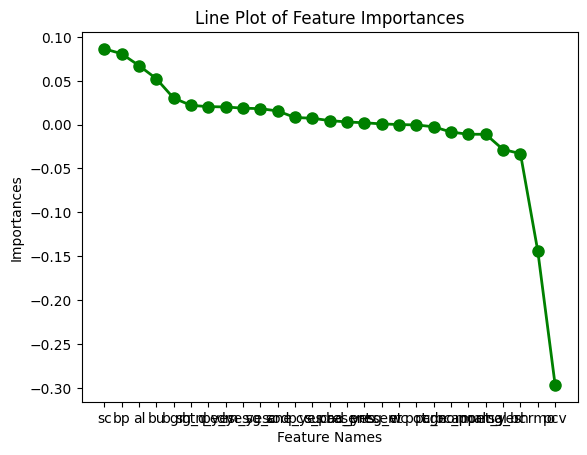

In [70]:
plt.plot(dflog1['Feature_Names'], dflog1['Importances'], color='green', marker='o', linestyle='-', linewidth=2, markersize=8)

# Add title and labels
plt.title('Line Plot of Feature Importances')
plt.xlabel('Feature Names')
plt.ylabel('Importances')

# Show the plot
plt.show()

# with DecisionTreeClassifier

In [57]:
des = DecisionTreeClassifier(criterion='entropy')
des .fit(x_train,y_train)
importances= des.feature_importances_
for feature, importance in zip(indep, importances):
    print(feature, importance)



age 0.012832253902731393
bp 0.01635718439896191
al 0.0
su 0.0
bgr 0.10047137309422971
bu 0.03681327598886253
sc 0.08853826610197649
sod 0.0
pot 0.0
hrmo 0.6494062206622117
pcv 0.0
wc 0.0
rc 0.027605636643417107
sg_b 0.0
sg_c 0.06797578920760912
sg_d 0.0
sg_e 0.0
rbc_normal 0.0
pc_normal 0.0
pcc_present 0.0
ba_present 0.0
htn_yes 0.0
dm_yes 0.0
cad_yes 0.0
appet_yes 0.0
pe_yes 0.0
ane_yes 0.0


In [58]:
dfdes=pd.DataFrame({'Feature_Names':indep.columns,'Importances':des.feature_importances_})
dfdes1=dfdes.sort_values(by='Importances',ascending=0)
dfdes1

,Feature_Names,Importances
9,hrmo,0.649406
4,bgr,0.100471
6,sc,0.088538
14,sg_c,0.067976
5,bu,0.036813
12,rc,0.027606
1,bp,0.016357
0,age,0.012832
20,ba_present,0.000000
19,pcc_present,0.000000


<BarContainer object of 27 artists>

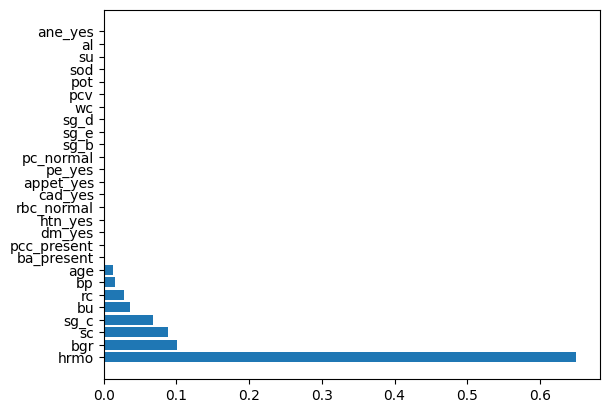

In [61]:
plt.barh(dfdes1['Feature_Names'],dfdes1['Importances'])

In [62]:
dfdes1.head(8)

,Feature_Names,Importances
9,hrmo,0.649406
4,bgr,0.100471
6,sc,0.088538
14,sg_c,0.067976
5,bu,0.036813
12,rc,0.027606
1,bp,0.016357
0,age,0.012832


# Random Forest

In [71]:
rf =RandomForestClassifier(n_estimators=10,criterion='entropy')
rf.fit(x_train,y_train)
importances= rf.feature_importances_
for feature, importance in zip(indep, importances):
    print(feature, importance)

age 0.002710835449561415
bp 0.02636452363456192
al 0.05531061378447285
su 0.005076955160625649
bgr 0.051241121249558354
bu 0.023399124155714098
sc 0.15032017408199744
sod 0.008149110432647806
pot 0.011753680208029485
hrmo 0.3651607674421
pcv 0.11432496555295871
wc 0.01079082293785101
rc 0.02209289007807084
sg_b 0.004615254275029501
sg_c 0.024717199752204683
sg_d 0.017366290178205124
sg_e 0.0
rbc_normal 0.001589229577886326
pc_normal 0.001279081478347578
pcc_present 0.0007130818177211137
ba_present 0.0
htn_yes 0.0340738123945276
dm_yes 0.053086065941130745
cad_yes 0.0
appet_yes 0.003654790319537981
pe_yes 0.011672675067904642
ane_yes 0.0005369350293552074


In [72]:
df=pd.DataFrame({'Feature_Names':indep.columns,'Importances':rf.feature_importances_})

df1=df.sort_values(by='Importances',ascending=False)
df1

,Feature_Names,Importances
9,hrmo,0.365161
6,sc,0.150320
10,pcv,0.114325
2,al,0.055311
22,dm_yes,0.053086
4,bgr,0.051241
21,htn_yes,0.034074
1,bp,0.026365
14,sg_c,0.024717
5,bu,0.023399


<BarContainer object of 27 artists>

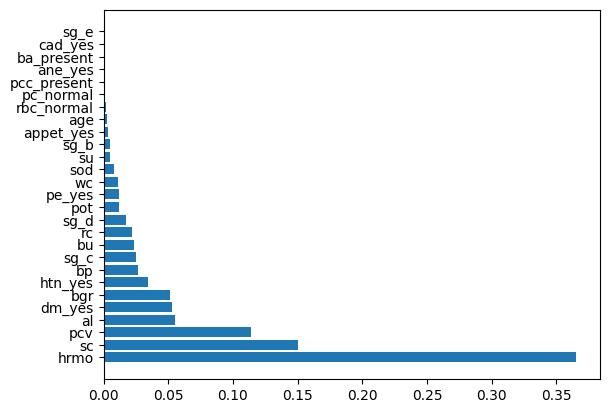

In [73]:
plt.barh(df1['Feature_Names'],df1['Importances'])

# Analysis Result

## DecisionTreeClassifier gives less features and more acuracy 